# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %matplotlib notebook

In [4]:
sinasc = pd.read_csv('sinasc_RO_2019.csv')

sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [5]:
sinasc.loc[sinasc['APGAR5'] <= 3, 'APGAR5_CLASS'] = 'asfixia grave'
sinasc.loc[(sinasc['APGAR5'] > 3) & (sinasc['APGAR5'] <= 5), 'APGAR5_CLASS'] = 'asfixia moderada'
sinasc.loc[(sinasc['APGAR5'] > 5) & (sinasc['APGAR5'] <= 7) , 'APGAR5_CLASS'] = 'asfixia leve'
sinasc.loc[sinasc['APGAR5'] > 7, 'APGAR5_CLASS'] = 'normal'

sinasc[['APGAR5', 'APGAR5_CLASS', 'SEXO', 'GESTACAO']].head(10)

,APGAR5,APGAR5_CLASS,SEXO,GESTACAO
0,10.0,normal,Masculino,37 a 41 semanas
1,9.0,normal,Feminino,37 a 41 semanas
2,10.0,normal,Feminino,37 a 41 semanas
3,10.0,normal,Feminino,37 a 41 semanas
4,10.0,normal,Feminino,37 a 41 semanas
5,10.0,normal,Masculino,37 a 41 semanas
6,10.0,normal,Feminino,37 a 41 semanas
7,10.0,normal,Feminino,37 a 41 semanas
8,9.0,normal,Masculino,37 a 41 semanas
9,10.0,normal,Feminino,37 a 41 semanas


In [6]:
sinasc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 70 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

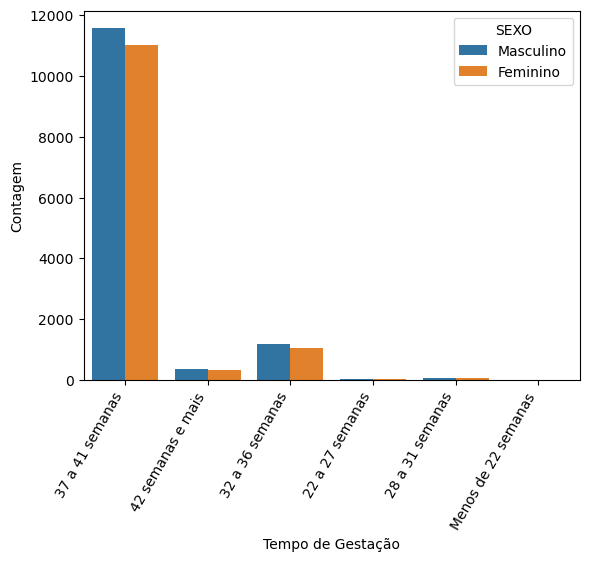

In [16]:
    #Opção 1
    sns.countplot(x='GESTACAO', 
                  hue='SEXO',
                  data=sinasc)
    
    plt.xticks(rotation=60, ha='right')
    plt.xlabel('Tempo de Gestação')
    plt.ylabel('Contagem')
    plt.show()

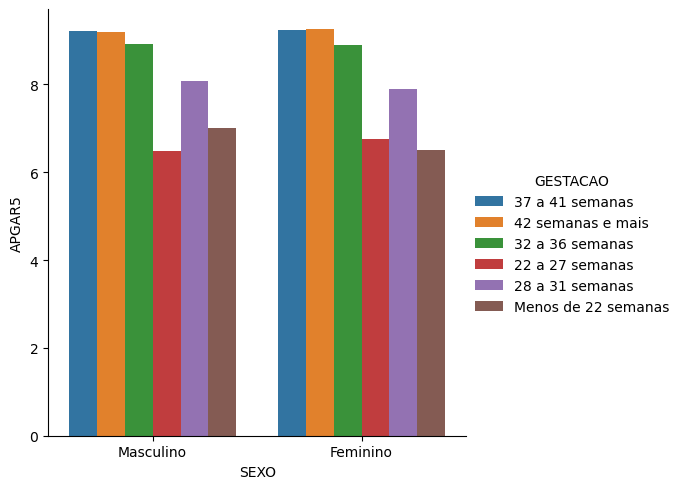

In [54]:
#Opção 2

sns.catplot(x='SEXO',
            y='APGAR5',
            hue='GESTACAO',
            kind='bar',
            data=sinasc,
            ci = None
           )



####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [32]:
freq_apgar5_gestacao = pd.crosstab(sinasc['APGAR5_CLASS'], sinasc['GESTACAO'])
freq_apgar5_gestacao

GESTACAO,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais,Menos de 22 semanas
APGAR5_CLASS,,,,,,
asfixia grave,21,3,8,33,1,2
asfixia leve,12,18,73,196,6,1
asfixia moderada,1,12,19,28,1,0
normal,51,129,2134,22266,690,4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [33]:
freq_pctlin = freq_apgar5_gestacao.div(freq_apgar5_gestacao.sum(axis = 1), axis = 0)
freq_pctlin

GESTACAO,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais,Menos de 22 semanas
APGAR5_CLASS,,,,,,
asfixia grave,0.308824,0.044118,0.117647,0.485294,0.014706,0.029412
asfixia leve,0.039216,0.058824,0.238562,0.640523,0.019608,0.003268
asfixia moderada,0.016393,0.196721,0.311475,0.459016,0.016393,0.000000
normal,0.002018,0.005104,0.084435,0.880984,0.027301,0.000158


In [21]:
freq_pctlin.sum(axis = 1)

APGAR5
0.0     1.0
1.0     1.0
2.0     1.0
3.0     1.0
4.0     1.0
5.0     1.0
6.0     1.0
7.0     1.0
8.0     1.0
9.0     1.0
10.0    1.0
dtype: float64

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

Text(0.5, 1.0, 'PERCENTUAL APGAR5 X TMP GESTAÇÃO')

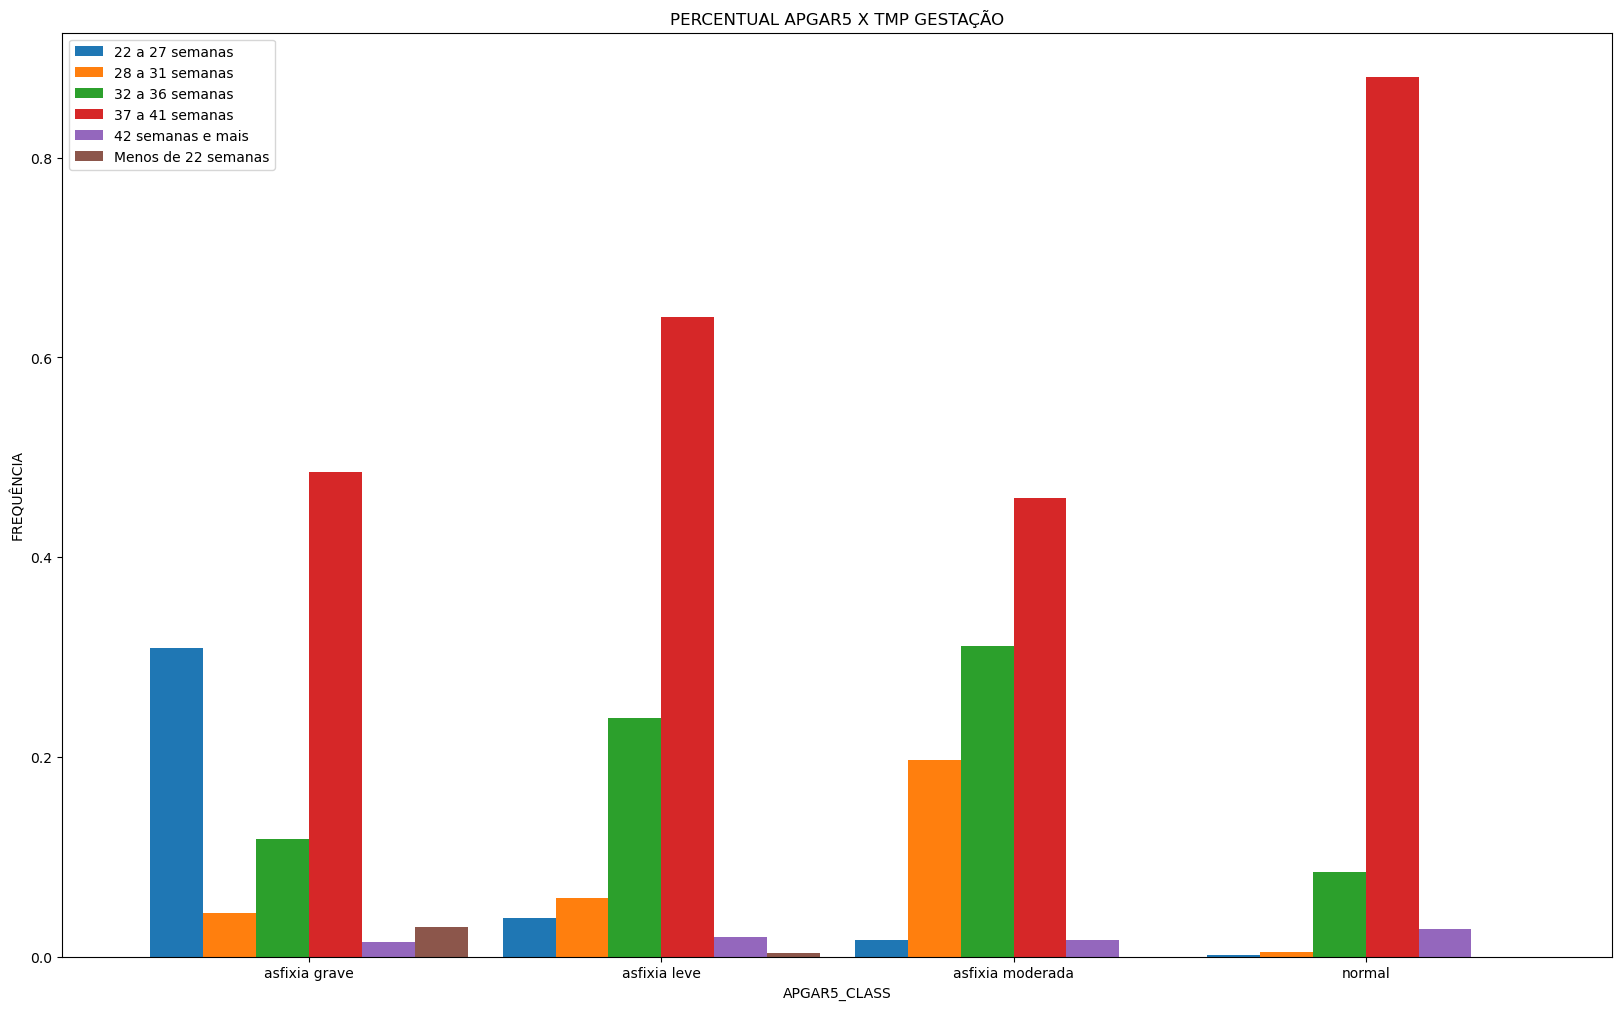

In [35]:
fig, ax = plt.subplots(figsize=(20, 12))

freq_pctlin.plot.bar(ax=ax, width=0.9)
plt.legend(loc='upper left')

plt.xticks(rotation=0)
plt.xlabel('APGAR5_CLASS')
plt.ylabel('FREQUÊNCIA')
plt.title('PERCENTUAL APGAR5 X TMP GESTAÇÃO')


Entendo que corrobora sim, pois podemos observar que grande parte dos nascidos com <37 semanas, tem o apgar com grau de asfixia grave a moderada, enquanto os nascidos com 37 ou mais tem poucos casos de esfixia, com exceção dos nascidos com 42 semanas ou mais, que também tem uma quantidade consideravel com asfixia, o que acredito que são casos com nascimento tardio.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

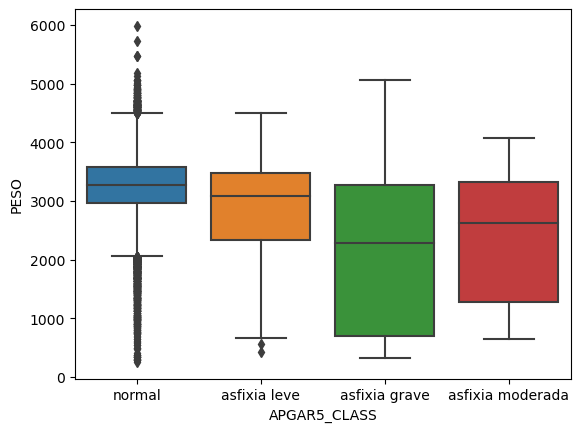

In [43]:
ax = sns.boxplot(data = sinasc, y="PESO", x="APGAR5_CLASS", orient="v")

(array([0, 1, 2, 3]),
 [Text(0, 0, 'normal'),
  Text(1, 0, 'asfixia leve'),
  Text(2, 0, 'asfixia grave'),
  Text(3, 0, 'asfixia moderada')])

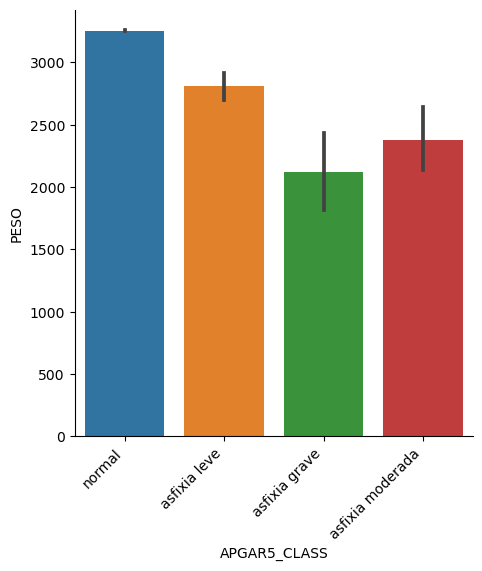

In [48]:
sns.catplot(x='APGAR5_CLASS'
            , y='PESO'
            , kind='bar'
            , data=sinasc
           )

plt.xticks(rotation=45, ha='right')